In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Generate synthetic dataset
np.random.seed(42)
X = np.random.randn(100, 3)  # 100 samples, 3 features
y = 3 * X[:, 0] - 2 * X[:, 1] + 0.5 * np.random.randn(100)  # Linear relation with noise


In [3]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Elastic Net Regression
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  # alpha: λ, l1_ratio: mix of L1 and L2
elastic_net.fit(X_train, y_train)

# Predictions
y_pred = elastic_net.predict(X_test)

# Coefficients
print("Elastic Net Coefficients:", elastic_net.coef_)


Elastic Net Coefficients: [ 2.31198506 -1.68279791 -0.01415015]


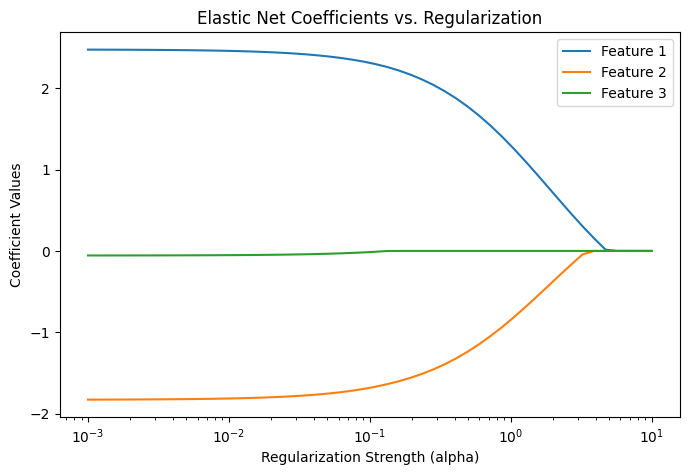

In [6]:
alphas = np.logspace(-3, 1, 50)
coefs = []

for a in alphas:
    model = ElasticNet(alpha=a, l1_ratio=0.5)
    model.fit(X_train, y_train)
    coefs.append(model.coef_)

plt.figure(figsize=(8, 5))
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel("Regularization Strength (alpha)")
plt.ylabel("Coefficient Values")
plt.title("Elastic Net Coefficients vs. Regularization")
plt.legend(["Feature 1", "Feature 2", "Feature 3"])
plt.show()


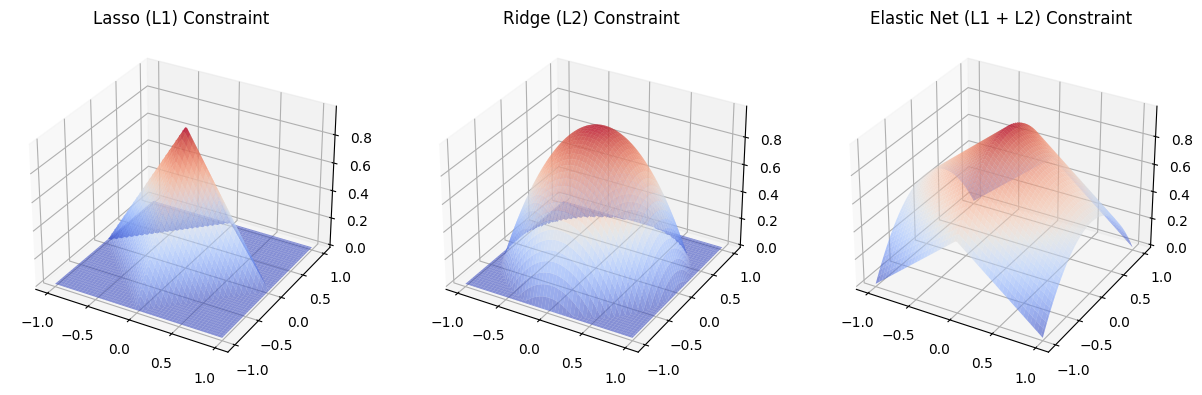

In [7]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 5))

# Lasso (L1) constraint
ax1 = fig.add_subplot(131, projection='3d')
X1, X2 = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
Z = 1 - np.abs(X1) - np.abs(X2)
Z[Z < 0] = 0
ax1.plot_surface(X1, X2, Z, cmap='coolwarm', alpha=0.6)
ax1.set_title("Lasso (L1) Constraint")

# Ridge (L2) constraint
ax2 = fig.add_subplot(132, projection='3d')
X1, X2 = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
Z = 1 - (X1**2 + X2**2)
Z[Z < 0] = 0
ax2.plot_surface(X1, X2, Z, cmap='coolwarm', alpha=0.6)
ax2.set_title("Ridge (L2) Constraint")

# Elastic Net (Mix of L1 & L2)
ax3 = fig.add_subplot(133, projection='3d')
Z = 1 - 0.5 * np.abs(X1) - 0.5 * (X2**2)
Z[Z < 0] = 0
ax3.plot_surface(X1, X2, Z, cmap='coolwarm', alpha=0.6)
ax3.set_title("Elastic Net (L1 + L2) Constraint")

plt.show()
